# DAML 05 - Seaborn

Michal Grochmal <michal.grochmal@city.ac.uk>

A higher level plotting library.
Where by higher-level we mean that it is capable of producing specific types of plots
without the need to draw every axes of it.  Also, contrary to `matplotlib`, `seaborn`
can operate directly on `pandas`' data frames.

`seaborn` depends on `matplotlib`, i.e. it is built on top of it, but also depends on
`numpy`, `pandas` and `scipy` for several of its plots.  Moreover, the Python `statsmodels`
library can also be used by `seaborn` to get nicer plots.  Despite the fact that we will not
cover the `statsmodels` or `scipy` libraries both deserve a mention:

-   [scipy][] is the mathematical library for Python on top of NumPy,
    it is originally built for signal processing yet contains some regression
    and statistical models.

-   [statsmodels][] has a good deal of statistical models but also several
    tools to perform statistical test (e.g. several null hypothesis tests).

[scipy]: https://docs.scipy.org/doc/scipy/reference/ "scipy documentation"
[statsmodels]: http://www.statsmodels.org "statsmodels documentation"

And there's more: `seaborn` has a better set of plot aesthetics that makes `matplotlib` plots
look considerably nicer.  We have been using the `seaborn-whitegrid` style for a while already,
yet the full extent of `seaborn` aesthetics is often even more pleasing to the eye.
And good looking graphs are particularly important if you need to convince someone that
your work is meaningful (unfortunately, but that is the harsh reality).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.5, 6.0)
import numpy as np
import pandas as pd

With imports done let's compare `matplotlib` graphs before and after applying
`seaborn`'s styles.

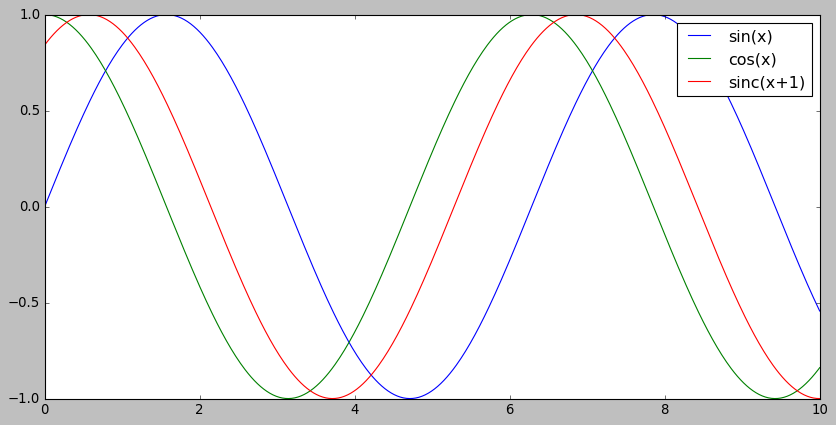

In [2]:
x = np.linspace(0, 10, 500)
y = np.array([np.sin(x), np.cos(x), np.sin(x+1)]).T
plt.plot(x, y)
plt.legend(['sin(x)', 'cos(x)', 'sinc(x+1)']);

In [3]:
import seaborn as sns
sns.set()

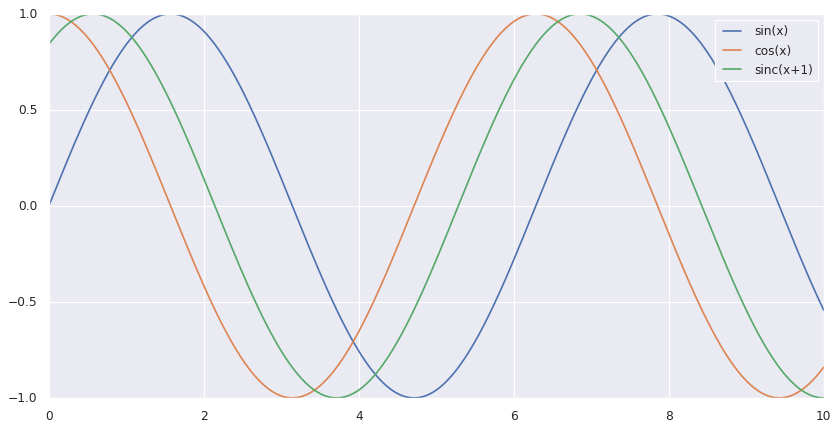

In [4]:
plt.plot(x, y)
plt.legend(['sin(x)', 'cos(x)', 'sinc(x+1)']);

## Distributions

Let's use again the Iris dataset to go on a whirlwind tour of `seaborn` histograms
and sample distribution plots.

In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


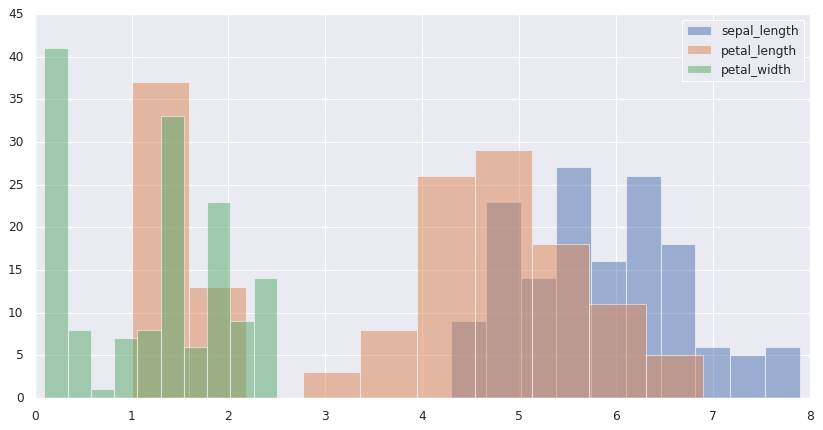

In [6]:
ax = plt.axes()
ax.hist(iris.sepal_length, alpha=0.5)
ax.hist(iris.petal_length, alpha=0.5)
ax.hist(iris.petal_width, alpha=0.5)
ax.legend();

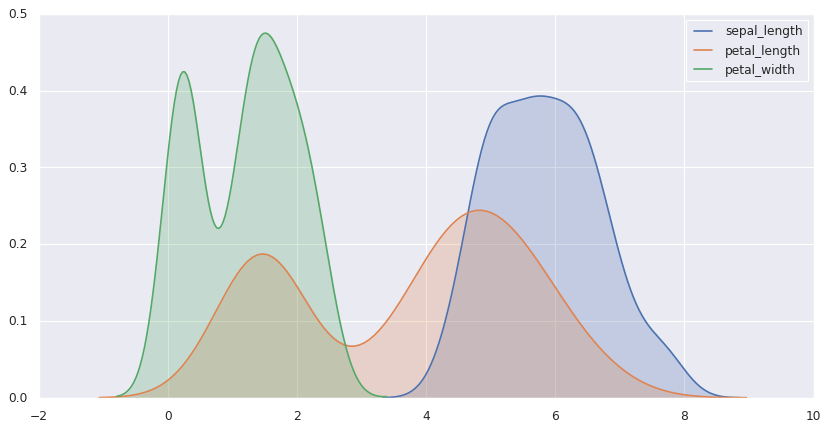

In [7]:
ax = plt.axes()
sns.kdeplot(iris.sepal_length, shade=True, ax=ax)
sns.kdeplot(iris.petal_length, shade=True, ax=ax)
sns.kdeplot(iris.petal_width, shade=True, ax=ax)
ax.set_ylim((0, 0.5));  # KDE is always normalised

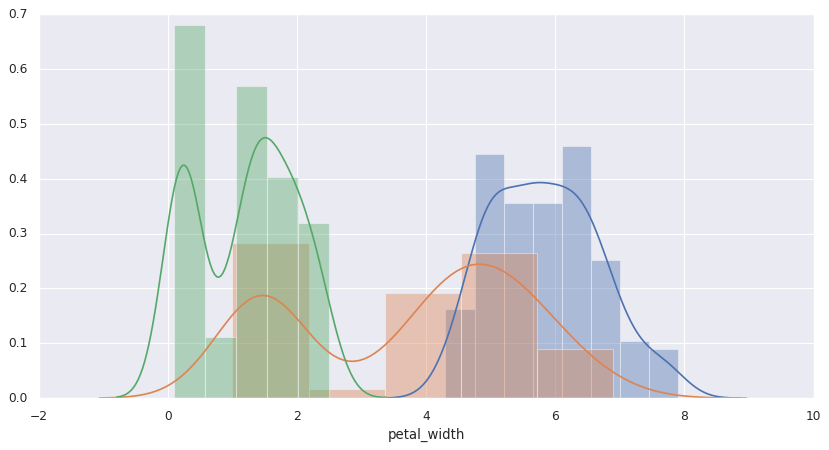

In [8]:
ax = plt.axes()
sns.distplot(iris.sepal_length, ax=ax)
sns.distplot(iris.petal_length, ax=ax)
sns.distplot(iris.petal_width, ax=ax);
ax.set_ylim((0, 0.7));

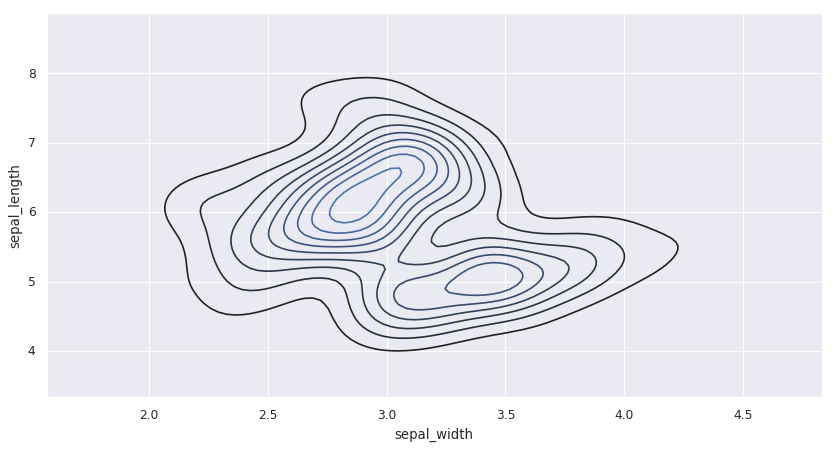

In [9]:
sns.kdeplot(iris.sepal_width, iris.sepal_length);

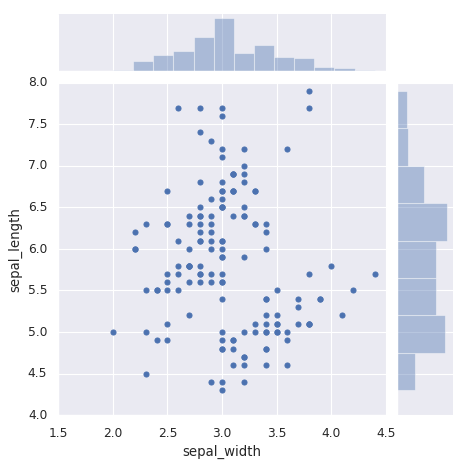

In [10]:
sns.jointplot(iris.sepal_width, iris.sepal_length);

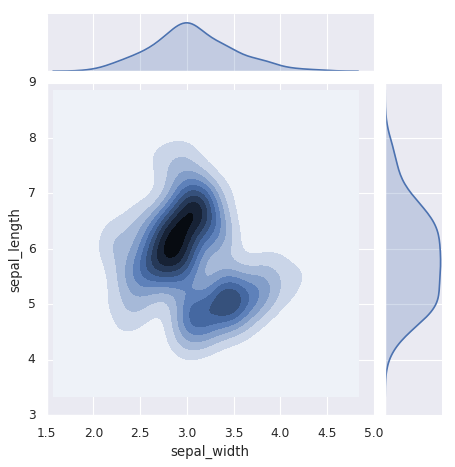

In [11]:
sns.jointplot(iris.sepal_width, iris.sepal_length, kind='kde');

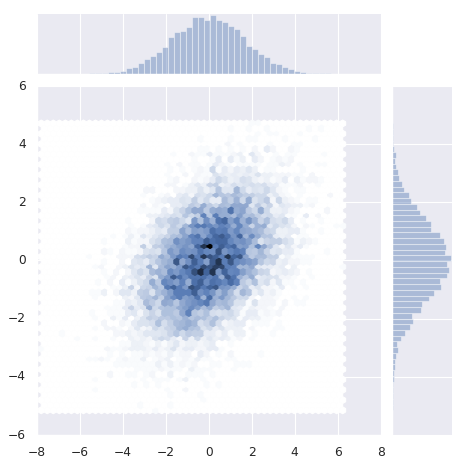

In [12]:
mean = [0, 0]
cov = [[3, 1],
       [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10240).T
sns.jointplot(x, y, kind='hex');

## Joint Plots

The joint plot plots one vector against another, and it can even perform a regression for us.
We will see much more about regression later, for now let's see how the orbital period and mass
of a planet are related to each other.  We can load a dataset about recently discovered planets
directly from `seaborn`.

In [13]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


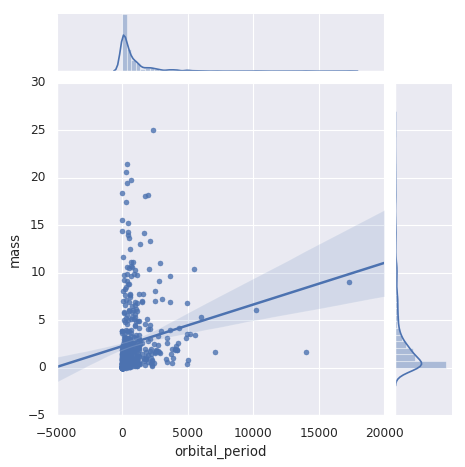

In [14]:
sns.jointplot(planets.orbital_period, planets.mass, kind='reg');

## Pair Plot

If we do not require the lateral histograms, which is normally when data points
do not overlap much, we can compare more vectors at the same time with `pairplots`.
Here we can see why the Iris dataset is so popular, it is a great example of
three classes where one can be easily separated but the other two cannot.

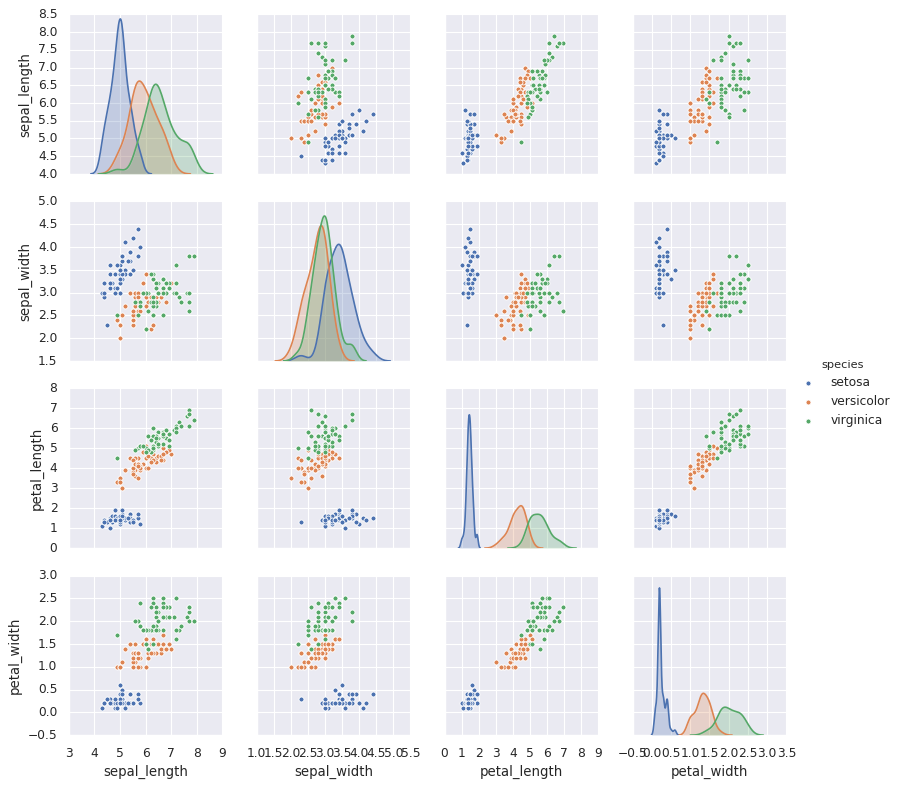

In [15]:
sns.pairplot(iris, hue='species');

## Facets

When comparing a numeric quantity against a categorical quantity we would often
group by the categorical quantity.  Facet plots allow us to perform the grouping
against one or even two categorical quantities as a grid, with the group by
operation implicit into the grid.  This is very visible on the titanic dataset.

In [16]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


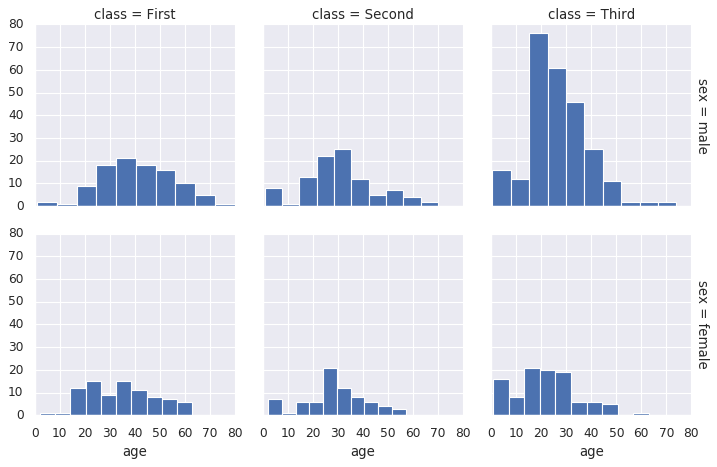

In [17]:
grid = sns.FacetGrid(titanic, row='sex', col='class', margin_titles=True)
grid.map(plt.hist, 'age');

## Factor (Cat) Plots

Quantiles are often used to describe one feature of data.  Just like with the facet,
`seaborn` allows us to look at quantiles whilst grouping by a category.
In several different visuals at that.

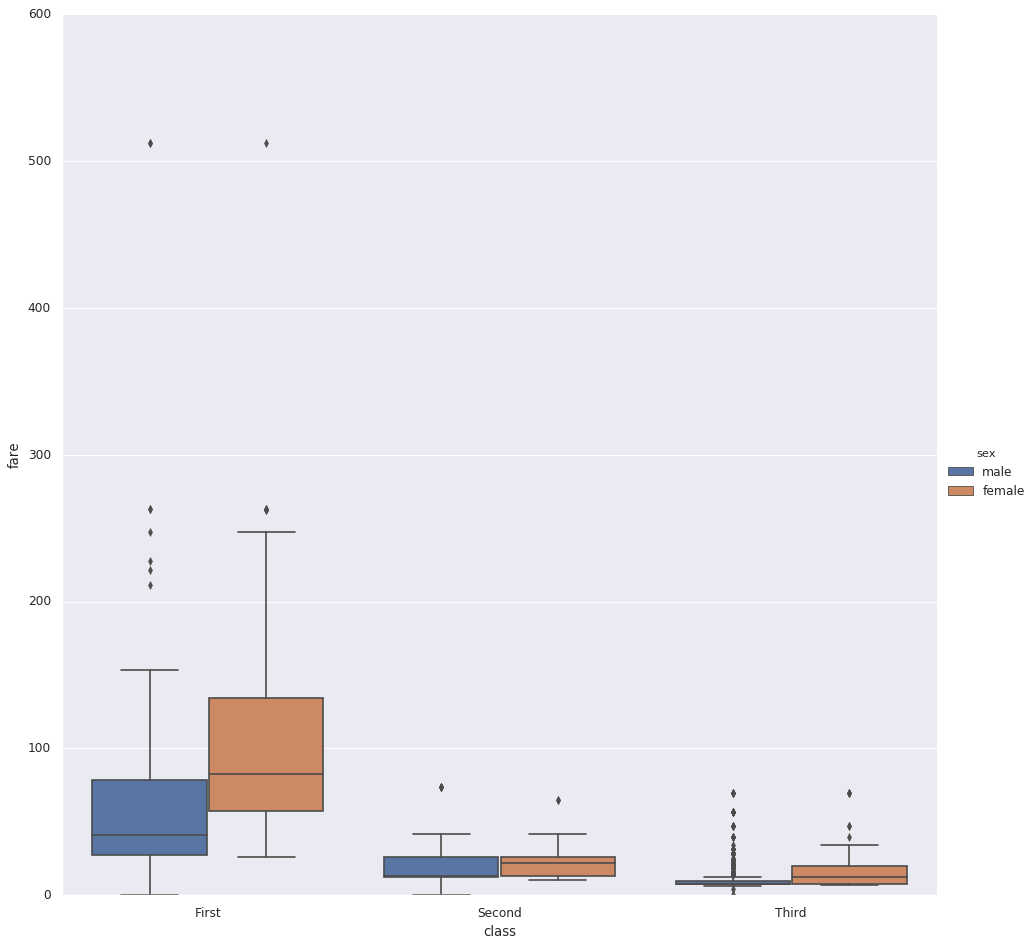

In [18]:
#sns.factorplot('class', 'fare', 'sex', data=titanic, kind='box', size=12)  # old seaborn
sns.catplot('class', 'fare', 'sex', data=titanic, kind='box', height=12);

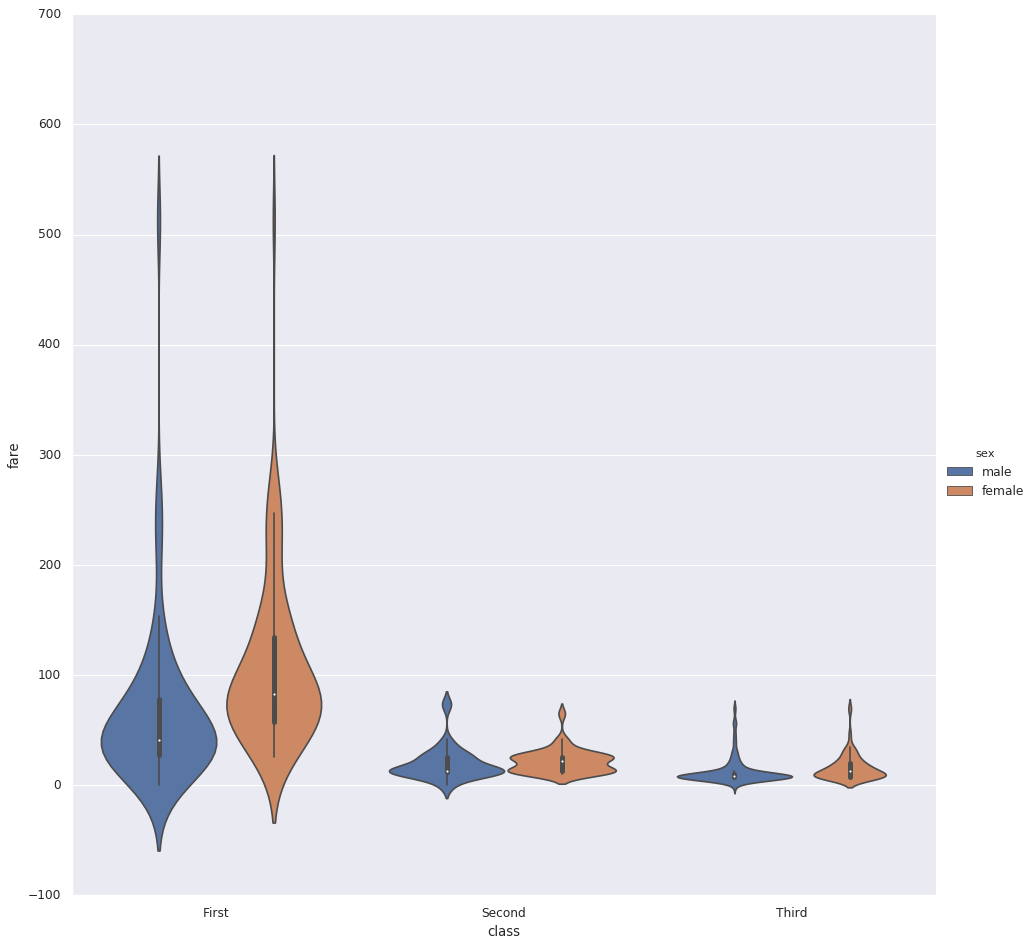

In [19]:
#sns.factorplot('class', 'fare', 'sex', data=titanic, kind='violin', size=12)  #old seaborn
sns.catplot('class', 'fare', 'sex', data=titanic, kind='violin', height=12);

## Bars

Same as with facets and factor plots the bar plots also allow for groupings.

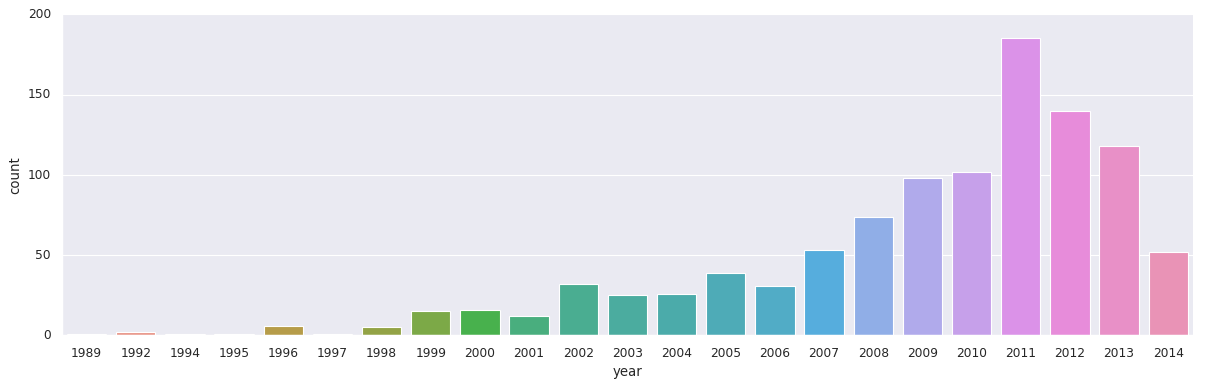

In [20]:
#sns.factorplot('year', data=planets, kind='count', aspect=3)  # old seaborn
sns.catplot('year', data=planets, kind='count', aspect=3);

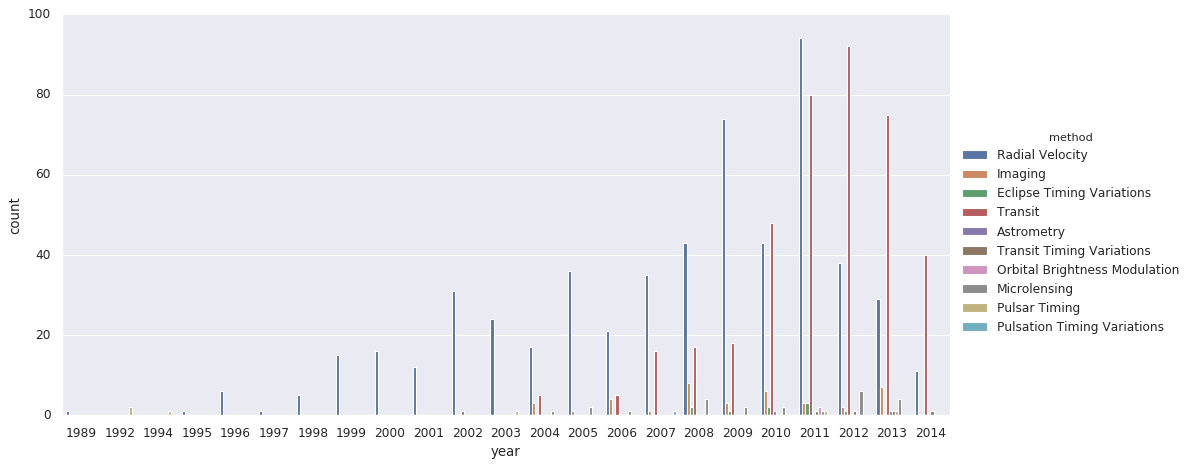

In [21]:
#sns.factorplot('year', data=planets, hue='method', kind='count', aspect=2, size=6)  # old seaborn
sns.catplot('year', data=planets, hue='method', kind='count', aspect=2, height=6);